최규빈 교수님 통계전산 수업 정리

수업에서는 Julia를 사용하지만 필요한 부분만 Python으로 바꾸어 작성하겠다.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 통계 전산

## 로드맵

`-` 통계

- 일반통계학 개념의 백업
- 여러가지 분포리뷰, 어떠한 분포에서 샘플을 추출하는 방법
- 수렴
- 추정 및 검정
- 부트스트랩
- 선형회귀분석

`-` 선형대수학

- 백터공간, rank
- 직교행렬, 사영행렬, 양정치행렬...
- 매트릭스를 해석하는 방식 (이미지, 데이터프레임, 변환)...
- 분해이론: 고유값분해, SVD
- 벡터나 매트릭스의 미분..

## 베르누이

## 이항분포

1회당 성공확률이 p. n번을 시행해서 성공한 횟수가 X. 이를 N번 반복해서 나온 성공값들을 분포로 나타낸게 이항분포?

## 포아송분포 ($X \sim Poi(\lambda)$)

`-` 포아송분포의 요약

- X의의미: 발생횟수의 평균이 λ인 분포에서 실제 발생횟수를 X라고 한다.

- X의범위: 발생안할수도 있으므로 X=0이 가능. 따라서 X=0,1,2,3,...

- 파라메터의 의미와 범위: λ = 평균적인 발생횟수; λ>0.

- pdf:

- mgf:

- E(X): λ

- V(X): λ

단위시간동안 어떤 이벤트가 발생했는데, 그 이벤트의 횟수가 포아송.

### [포아송분포의 예시](https://www.statology.org/poisson-distribution-real-life-examples/#:~:text=Example%201%3A%20Calls%20per%20Hour,receives%2010%20calls%20per%20hour.)

- 콜센타에 걸려오는 전화의 수, 1시간동안

- 레스토랑에 방문하는 손님의 수, 하루동안

- 웹사이트를 방문하는 사람의 수, 1시간동안

- 파산하는 사람의 수, 1달동안

- 네트워크의 끊김 수, 1주일동안

#### How to generate it?

평균 3인 포아송분포에서 100개 샘플을 뽑는 방법

방법1)

In [16]:
pois = np.random.poisson(3, 100)
pois

array([ 3,  4,  0,  7,  1,  3,  3,  5,  3,  2,  2,  6,  3,  5,  3,  2,  1,
        4,  4,  2,  8,  3,  3,  3,  2,  0,  3,  5,  2,  2,  2,  2,  5,  4,
        4,  7,  3,  5,  6,  2,  2,  1,  7,  3,  3,  1,  5,  5,  5,  6,  2,
        3,  3,  3,  2,  5,  2,  6,  2,  5,  4,  0,  3,  4,  2,  0,  3,  3,
        3,  4,  2,  3,  1,  1,  1,  5,  6,  2,  1,  3,  3,  3,  2,  7,  4,
        2,  2,  4,  3,  1,  5,  2, 10,  6,  2,  4,  0,  3,  2,  1])

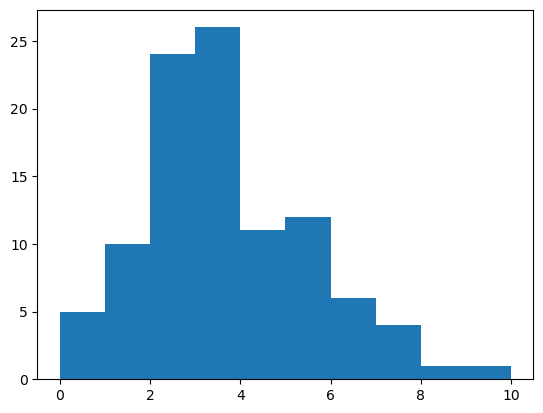

In [17]:
plt.hist(pois);

# bar plot으로 나타내는 법
# unique_values, count = np.unique(pois, return_counts=True)
# plt.bar(unique_values, count)
# ax = plt.gca()
# ax.set_xlim([-1,11])
# plt.title("pois")
# plt.xticks(np.arange(0,11,1)); # x축 1간격

방법2) 이항분포의 포아송근사를 이용

이론: 이항분포에서 (1) $n→\infty$ (2) $p→0$ (3) $np=\lambda$ 이면 이것은 평균이 $\lambda$ 인 포아송분포로 근사함.

평균이 $\lambda$ 인 포아송분포는 $B(n,\frac{\lambda}{n})$ 로 근사할 수 있다. 이때
$n$이 커질수록 더 정확해짐.

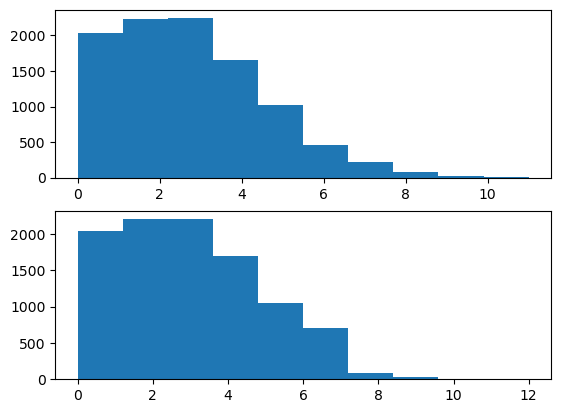

In [6]:
N = 10000
λ = 3
n = 10000
p = λ/n
X = np.random.binomial(n, p, N)
Y = np.random.poisson(λ, N)

fig, ((ax1), (ax2)) = plt.subplots(2,1)
ax1.hist(X);
ax2.hist(Y);

방법3) 균등분포 → 베르누이 → 이항분포 ≈ 포아송

- 1분동안 맥도날드에 평균 3명이 온다고 생각
- 이건 사실 1초에 성공확률이 0.05인 베르누이 시행을 1번 시행하여 1분동안 총 60회 반복한 것으로 이해할 수 있음.
- 좀 더 세밀하게는 0.001초에 성공확률이 5.0e-5인 베르누이 시행을 1번 시행하여 1분동안 총 60000회 반복한 것으로도 이해할 수 있음. (무한반복 가능)
- 느낌: 하여튼 (1) "엄청 작은 시간"에 (2) "엄청 작은 확률"의 베르누이 시행이 (3) "엄청 많이 독립적으로 반복" 되는 느낌을 기억!! = 포아송 프로세스


In [7]:
λ=3
n=60000
p=λ/n
Δt = (60/n) # 단위가 60초니까 60

N = 10000
X = [sum(np.random.uniform(0,1,n)<p) for i in range(N)]

Text(0.5, 1.0, 'Poisson')

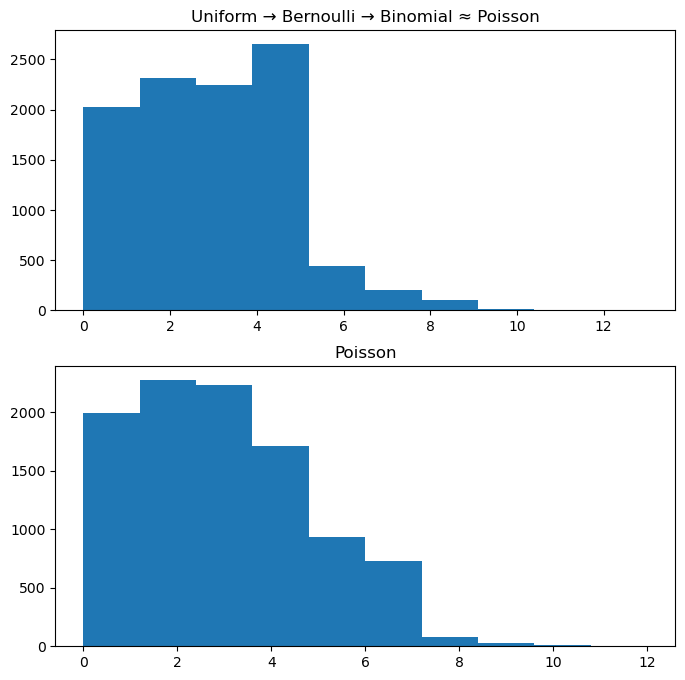

In [8]:
fig, ((ax1), (ax2)) = plt.subplots(2,1, figsize=(8,8))

ax1.hist(X)
ax2.hist(np.random.poisson(λ, N));

ax1.set_title("Uniform → Bernoulli → Binomial ≈ Poisson")
ax2.set_title("Poisson")

방법4) 균등분포 → inverse cdf method를 이용해서 생성할 수 있음.

> `-` Inverse CDF Method??
> 모든 확률 분포의 누적 분포 함수(cumulative distribution function, cdf)가 균등분포를 따른다는 성질을 이용한 방법

> 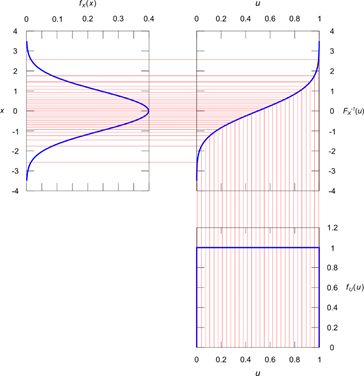

> 보통 난수를 일으킬 때에는 균등분포 난수 생성기를 이용하여 난수를 일으킨다.
> 그런데 만약 어떤 특정한 함수를 따르는 난수를 만들어내고 싶다면??
> Inverse CDF Method를 사용하면 된다. 추후 수식 관련하여 자세히 다루기.

- 포아송 분포의 합은 다시 포아송분포가 된다.

- 이론: $X \sim Poi(\lambda_1), Y \sim Poi(\lambda_2), X \bot Y \Rightarrow X+Y\sim Poi(\lambda_1+\lambda_2)$
- 의미?: (1) 1분동안 맥도날드 매장에 들어오는 남자의 수는 평균이 5인 포아송 분포를 따름. (2) 1분동안 맥도날드 매장에 들어오는 여자의 수는 평균이 4.5인 포아송 분포를 따름. (3) 남자와 여자가 매장에 오는 사건은 독립 $\rightarrow$ 1분동안 맥도날드 매장에 오는 사람은 평균 9.5인 포아송 분포를 따른다는 의미

In [18]:
N = 1000
X = np.random.poisson(5, N)
Y = np.random.poisson(4.5, N)

p1 = X+Y
p2 = np.random.poisson(9.5, N)

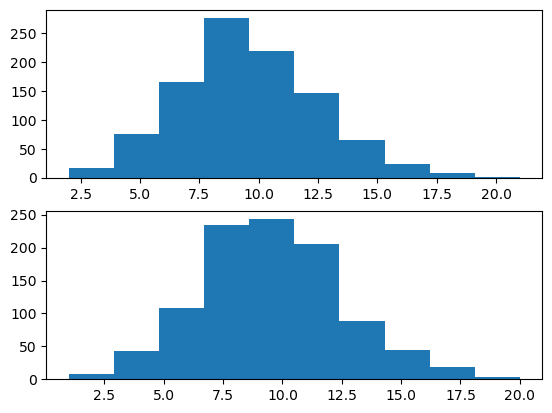

In [19]:
fig, ((ax1), (ax2)) = plt.subplots(2,1)
ax1.hist(p1)
ax2.hist(p2);

#### 평균과 분산의 추정

In [11]:
N = 1000
λ=5
X=np.random.poisson(λ, N)

print(f"평균: {λ}\
      \n평균의 추정치: {np.mean(X)}\
      \n분산: {λ}\
      \n분산의 추정치: {np.var(X)}")

평균: 5      
평균의 추정치: 4.914      
분산: 5      
분산의 추정치: 5.134604


`-` 생각해보니까 이론적으로 평균과 분산의 값이 같아야 한다는 걸 알고 있다. 그런데 왜 추정치가 달라야하나?? 둘 중 하나만 있으면 될 것 같다.

mean(X), var(X)로 $\lambda$를 추정

In [12]:
N = 10000
λ = 5

p1 = [np.mean(np.random.poisson(λ, N)) for i in range(100)]
p2 = [np.var(np.random.poisson(λ, N)) for i in range(100)]

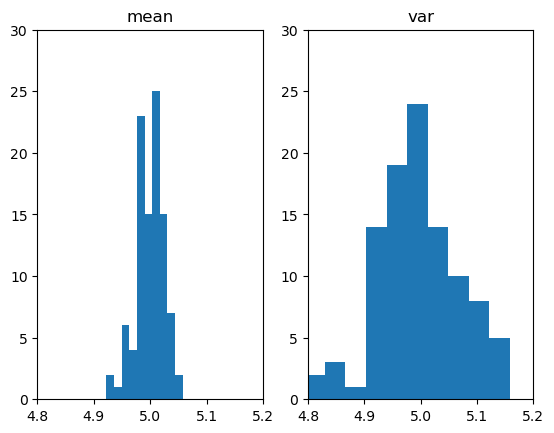

In [13]:
fig, ((ax1), (ax2)) = plt.subplots(1,2)

ax1.set_xlim([4.8, 5.2])
ax2.set_xlim([4.8, 5.2])

ax1.set_ylim([0, 30])
ax2.set_ylim([0, 30])

ax1.hist(p1)
ax2.hist(p2)

ax1.set_title("mean")
ax2.set_title("var");

- 히스토그램을 그려보니까 누가봐도 mean(X)로 λ를 추정하는 것이 var(X)로 λ를 추정하는 것보다 좋아보인다.

- 그냥 평균을 추정한다음 이 값을 평균과 분산이라고 주장하면 안되나? $\Rightarrow$ 된다!! 이게 바로 MLE

## 지수분포 $(X \sim Exp(1/\lambda))$)

### 지수분포의 요약

- X의 의미: 시간 1에 평균적으로 $\lambda$번 발생하는 사건이 있을 때 첫 번째 이벤트가 발생할 때까지 걸리는 시간.
- X의 범위: 시간은 양수이므로 X $\geq$ 0
- 파라메터의 의미: (1)$\lambda$ = 시간1에 평균적으로 발생하는 이벤트의 수 (2) 1/$\lambda$ = 한번의 이벤트가 발생할 때까지 평균적으로 걸리는 시간
- 파라메터의 범위: $\lambda$>0
- pdf: $f(x) = \lambda e^{- \lambda x}$
- mgf: 
- cdf: $F(x) = 1-e^{-\lambda x}$
- E(X) = $\frac{1}{\lambda}$
- V(X) = $\frac{1}{\lambda ^2}$

### How to generate it?

#### 평균이 10인 지수분포에서 10000개의 샘플을 뽑는 방법

방법1: 모듈 / 방법2: 포아송 프로세스 / 방법3: inverse cdf method

(방법1)

In [57]:
np.random.exponential(10, 10000)

array([ 2.81250688,  3.51950826,  9.34507485, ...,  1.21136792,
       15.43126406, 15.10395178])

(방법2) 포아송 $\rightarrow$ 지수분포 (X), 포아송프로세스 $\rightarrow$ 지수분포 (O)

- 맥도날드에 시간 1당 0.1명씩 평균적으로 방문한다. 1명 방문하는데에는 평균적으로 시간이 10이 걸린다고 볼 수 있음.
- 따라서 언뜻 생각하면 포아송과 지수분포는 역의 관계라서 포아송 분포를 만들고 역수를 취하면 지수분포를 쉽게 만들 수 있을 것 같다.

In [59]:
np.random.poisson(0.1, 10000)

array([0, 0, 0, ..., 0, 0, 1])

- 0이 나온다?
- 생각해보니 포아송은 정수이다. 0이 없다고 쳐도 역수를 취하면 나올 수 있는 값은 1, 1/2, 1/3, 1/4, ... 따위임 지수 분포는 $\frac{1}{0.5}, \frac{1}{1.5}$ 등의 값도 가능해야하는데 포아송은 정수이므로 이러한 역수가 불가능함 (애초에 틀린 접근)
- 아이디어: 극한의 베르누이로 포아송을 만들 때, 몇 번 성공했는지 관심을 가지고 카운팅 했음. $\Rightarrow$ 조금 응용해서 첫 성공까지 몇 번의 시도를 해야하는지 카운팅을 한다고 생각하면 시간 계산이 가능할 것 같다.
- 결국 "포아송분포 $\rightarrow$ 지수분포"로 추출하는 것이 아니라 "포아송프로세스 $\rightarrow$ 지수분포"와 같은 방식으로 추출해야 한다.

In [60]:
# 성공할때까지 시도하는 함수: 성공확률 → 1회 성공까지 시도한 횟수 (기하분포를 뽑는 함수!!)
def try_until_you_succeed(p):
    n_of_try = 0
    u = 0 # uniform
    while u < (1-p): # 실패했다면 / p=0이면 무한 반복
        u = np.random.uniform(0, 1)
        n_of_try += 1
    return n_of_try

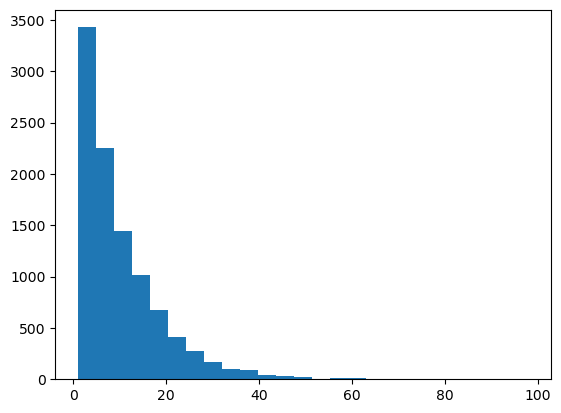

In [64]:
plt.hist([try_until_you_succeed(0.1) for k in range(10000)], bins=25);

In [79]:
N = 10000
λ = 0.1
n = 1000 # n->무한대. 10000이면 20분 넘게 걸려서 1000으로 줄임.
p = λ/n
Δt = (1/n) # 단위가 시간 1이니까 
X = np.array([try_until_you_succeed(p) for k in range(N)]) * Δt

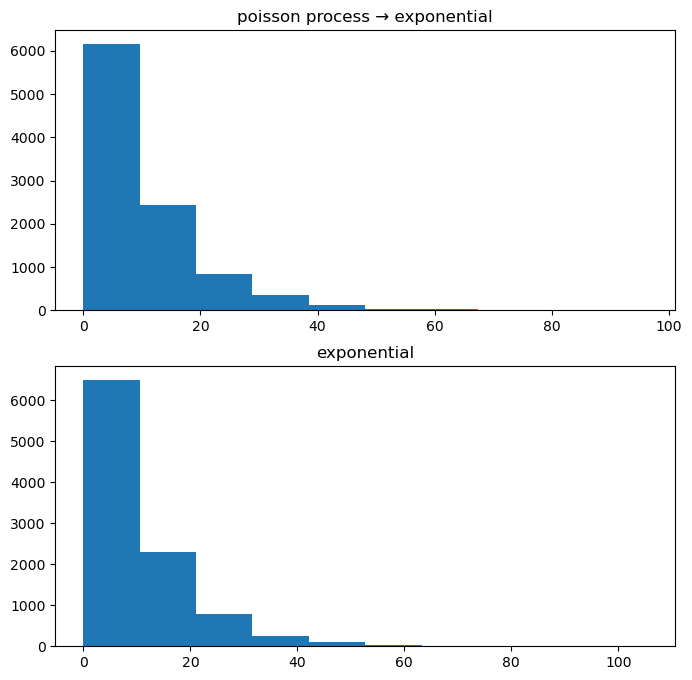

In [82]:
fig, ((ax1), (ax2)) = plt.subplots(2, 1, figsize = (8, 8))

ax1.hist(X)
ax2.hist(np.random.exponential(10, N))

ax1.set_title("poisson process → exponential")
ax2.set_title("exponential");

- 불평: 샘플하나뽑는데 시간이 오래걸림. (정확도를 올릴수록 더 오래걸림)

(방법3) inverse cdf method
- 이론적인 pdf를 알고 있다는 전제가 필요
- 자세하게 살펴보자

#### Inverse cdf method를 활용하여 지수분포에서 샘플 추출

- 아래와 같은 2개의 지수분포의 pdf를 고려하자. (평균이 1인 지수분포와 평균이 5인 지수분포)
$$f(x)=e^{-x}$$
$$g(x)=\frac{1}{5}e^{-\frac{1}{5}x}$$

- 각각의 pdf를 그려보면 아래와 같다.

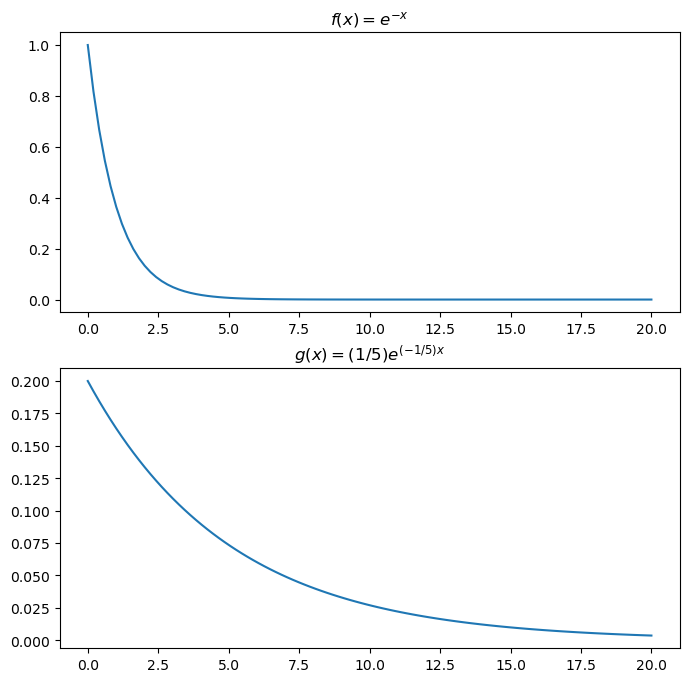

In [133]:
x = np.linspace(0, 20, 100)

def fx(x):
    return np.exp(-1*x)

def gx(x):
    return 1/5 * np.exp(-1/5*x)

fig, ((ax1), (ax2)) = plt.subplots(2,1, figsize=(8,8))

ax1.plot(x, fx(x))
ax2.plot(x, gx(x))

ax1.set_title("$f(x)=e^{-x}$")

ax2.set_title("$g(x)=(1/5)e^{(-1/5)x}$");

- 아래 그래프에서 뽑은 값이 더 클 것 같다. (위 그래프는 왼쪽에 몰려있음)

- 이번에는 각각의 cdf를 그려보자.
$$F(x) = \int^x_0f(\tau)d\tau = \int^x_0 e^{-\tau}d\tau=[-e^{-\tau}]^x_0 = 1-e^{-x}$$
$$G(x) = \int^x_0g(\tau)d\tau = \int^x_0 \frac{1}{5}e^{-\tau/5}d\tau=[-e^{-\tau/5}]^x_0 = 1-e^{-x/5}$$

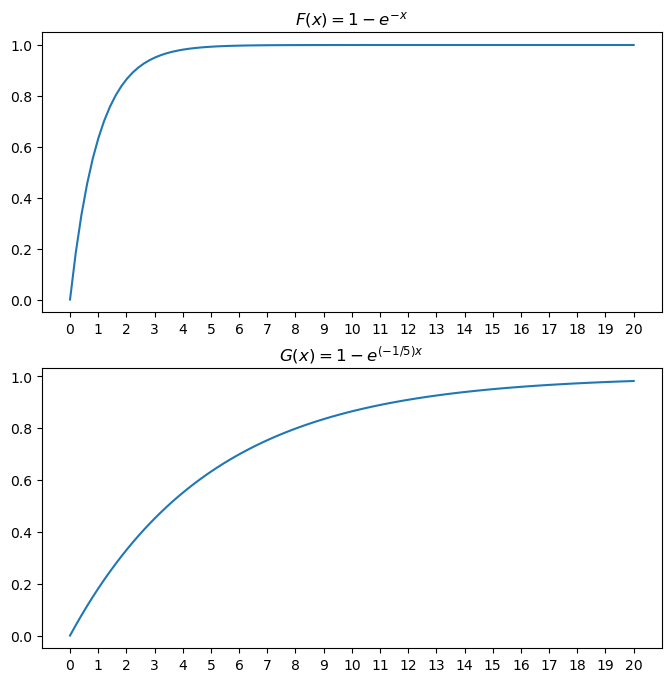

In [113]:
x = np.linspace(0, 20, 100)

def Fx(x):
    return 1-np.exp(-1*x)

def Gx(x):
    return 1-np.exp(-1/5*x)

fig, ((ax1), (ax2)) = plt.subplots(2,1, figsize=(8,8))

ax1.plot(x, Fx(x))
ax2.plot(x, Gx(x))

ax1.set_xticks(np.arange(0,21,1))
ax2.set_xticks(np.arange(0,21,1))

ax1.set_title("$F(x)=1-e^{-x}$")
ax2.set_title("$G(x)=1-e^{(-1/5)x}$");

In [130]:
print(f"{1, Fx(1)} 위 그래프에서 약 {round(Fx(1),2)*100}%는 1보다 작다.")
print(f"{5, Fx(5)} 위 그래프에서 약 {round(Fx(5),2)*100}%는 5보다 작다.")

(1, 0.6321205588285577) 위 그래프에서 약 63.0%는 1보다 작다.
(5, 0.9932620530009145) 위 그래프에서 약 99.0%는 5보다 작다.


In [131]:
print(f"{1, Gx(1)} 아래 그래프에서 약 {round(Gx(1),2)*100}%는 1보다 작다.")
print(f"{5, Gx(5)} 아래 그래프에서 약 {round(Gx(5),2)*100}%는 5보다 작다.")

(1, 0.18126924692201818) 아래 그래프에서 약 18.0%는 1보다 작다.
(5, 0.6321205588285577) 아래 그래프에서 약 63.0%는 5보다 작다.


`-` cdf 해석
- 위(평균이 1인 지수분포) = 5정도면 거의 cdf의 값이 1에 가까워짐.
- 아래(평균이 5인 지수분포) = 5정도면 값이 0.63정도임 $\rightarrow$ 100번 뽑으면 5보다 작은게 63개 정도...

`-` cdf의 y축에서 랜덤변수를 발생시킨다음 $\rightarrow \downarrow$와 같이 이동하여 $x$축에 내린다고 생각해보자. (역함수를 구하는 것)
- 위: 대부분 5이하에 떨어짐
- 아래: 약 63% 정도만 5이하에 떨어짐.

---

`-` 수리통계학 책

- 평균은 $\frac{1}{\lambda}$ 인데 수식에서 사용하는 값은 $\lambda$임 계산할 때 주의

- 이산형 확률분포에서 기하확률변수가 무기억 성질을 갖는 것처럼 연속형 확률변수 중에서는 지수확률변수가 동일한 성질을 지닌다.

- $X \sim EXP(\frac{1}{\lambda})$ 이면, 양의 실수 $a$와 $t$에 대해서,

    $$P(X>a+t|X>a) = P(X>t)$$ 

    가 성립한다.

    - 위 정리의 의미: 가령, 확률변수 $X$가 어떤 기계부품의 수명이라고 하면, $P(X>a+t|X>a)$는 시점 $a$에서 기계부품의 고장이 없을 때, 최소한 시간 $t$만큼 더 고장이 없을 사건에 대한 확률을 뜻한다. 따라서 정리의 무기억 성질은 변수 $X$가 시점 $a$에서 그동안 기계부품의 고장이 없었다는 조건을 '기억'하지 않고, 앞으로 시간 $t$만큼 더 고장이 없을 것만 고려한다는 것을 뜻하는 것으로, $a$시간만큼 일한 기계부품이 앞으로 $t$시간만큼 더 작동하는 확률이나 새 기계부품이 앞으로 $t$시간 만큼 더 작동하는 확률이나 같다는 것이다.